# 第6章 假设检验

## 初始化

In [1]:
# 本章需要用到的库
import numpy as np # 导入numpy库
import pandas as pd # 导入pandas库
import matplotlib.pyplot as plt # 导入matplotlib库
import seaborn as sns # 导入seaborn库
from scipy.stats import ttest_1samp, ttest_rel # 导入假设检验函数: 单样本t检验、配对样本t检验
from scipy.stats import norm, chi2, f # 导入分布函数: 正态分布、卡方分布、F分布
from scipy.stats import shapiro, kstest # 导入假设检验函数: 正态性检验
import statsmodels.api as sm # 导入statsmodels库
from statsmodels.stats.weightstats import ztest, ttest_ind # 导入假设检验函数: z检验和独立样本t检验

# 设置初始化
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

## 6.1 假设检验的原理

### 6.1.1 提出假设

### 6.1.2 做出决策

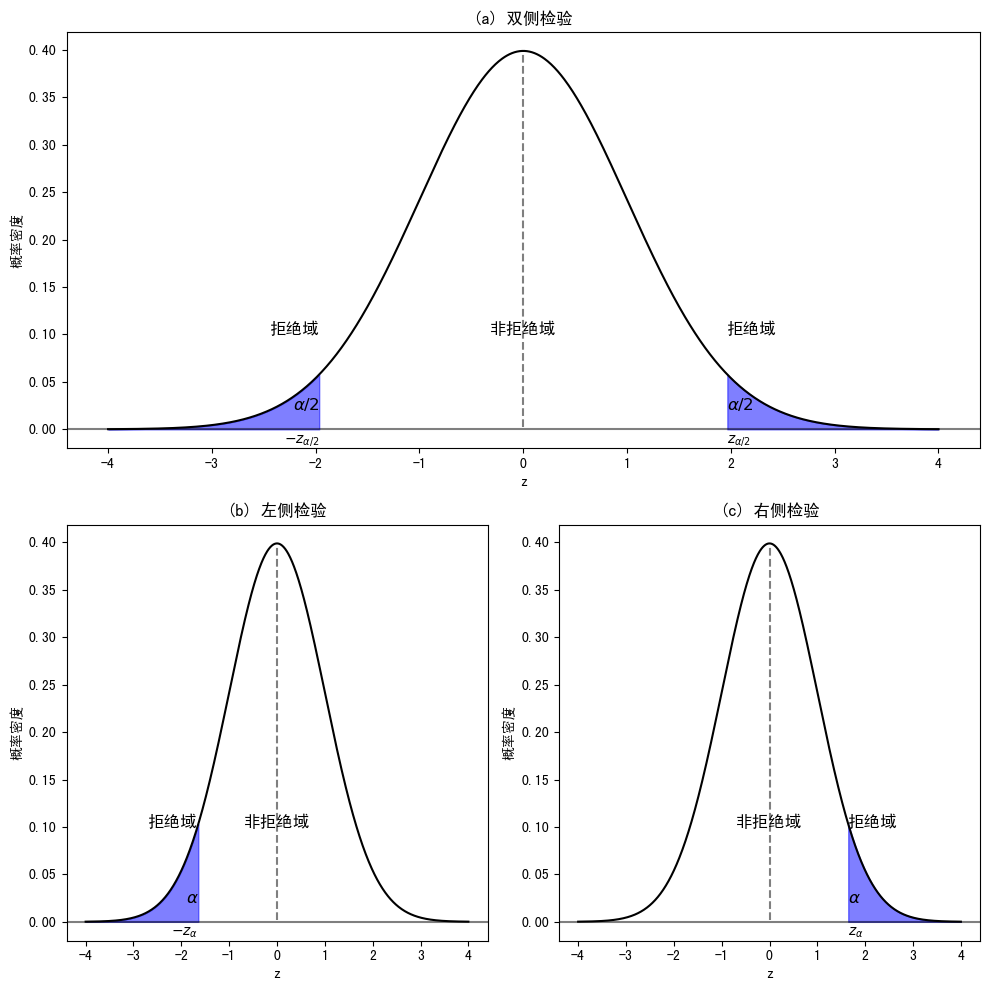

In [63]:
# 显著性水平、拒绝域和临界值
plt.figure(figsize=(10, 10)) # 设置画布大小
x = np.linspace(-4, 4, 1000) # 生成-4到4之间的1000个点
y = norm.pdf(x, 0, 1) # 生成标准正态分布的概率密度函数
alpha = 0.05 # 设置显著性水平

plt.subplot(211) # 设置子图1
plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
z1 = norm.ppf(alpha/2, 0, 1) # 计算左侧临界值
z2 = norm.ppf(1-alpha/2, 0, 1) # 计算右侧临界值
plt.fill_between(x, y, 0, where=(x<=z1), color='b', alpha=0.5) # 绘制左侧拒绝域
plt.fill_between(x, y, 0, where=(x>=z2), color='b', alpha=0.5) # 绘制右侧拒绝域
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(0, 0.1, '非拒绝域', fontsize=12, ha='center') # 显示非拒绝域
plt.text(z1, 0.1, '拒绝域', fontsize=12, ha='right') # 显示拒绝域
plt.text(z1, 0.02, r'$\alpha/2$', fontsize=12, ha='right') # 显示左侧概率
plt.text(z1, -0.015, r'$-z_{\alpha/2}$', fontsize=10, ha='right') # 显示左侧临界值
plt.text(z2, 0.1, '拒绝域', fontsize=12, ha='left') # 显示拒绝域
plt.text(z2, 0.02, r'$\alpha/2$', fontsize=12, ha='left') # 显示右侧概率
plt.text(z2, -0.015, r'$z_{\alpha/2}$', fontsize=10, ha='left') # 显示右侧临界值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签
plt.title('(a) 双侧检验') # 设置标题

plt.subplot(223) # 设置子图2
plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
z = norm.ppf(alpha, 0, 1) # 计算临界值
plt.fill_between(x, y, 0, where=(x<=z), color='b', alpha=0.5) # 绘制拒绝域
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(0, 0.1, '非拒绝域', fontsize=12, ha='center') # 显示非拒绝域
plt.text(z, 0.1, '拒绝域', fontsize=12, ha='right') # 显示拒绝域
plt.text(z, 0.02, r'$\alpha$', fontsize=12, ha='right') # 显示概率
plt.text(z, -0.015, r'$-z_{\alpha}$', fontsize=10, ha='right') # 显示临界值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签
plt.title('(b) 左侧检验') # 设置标题

plt.subplot(224) # 设置子图3
plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
z = norm.ppf(1-alpha, 0, 1) # 计算临界值
plt.fill_between(x, y, 0, where=(x>=z), color='b', alpha=0.5) # 绘制拒绝域
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(0, 0.1, '非拒绝域', fontsize=12, ha='center') # 显示非拒绝域
plt.text(z, 0.1, '拒绝域', fontsize=12, ha='left') # 显示拒绝域
plt.text(z, 0.02, r'$\alpha$', fontsize=12, ha='left') # 显示概率
plt.text(z, -0.015, r'$z_{\alpha}$', fontsize=10, ha='left') # 显示临界值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签
plt.title('(c) 右侧检验') # 设置标题

plt.tight_layout() # 设置子图的间距
plt.show() # 显示图像

利用统计量做检验时的决策准则：
- 双侧检验：|统计量| > 临界值， 拒绝原假设。
- 左侧检验： 统计量  < 临界值， 拒绝原假设。
- 右侧检验： 统计量  > 临界值， 拒绝原假设。

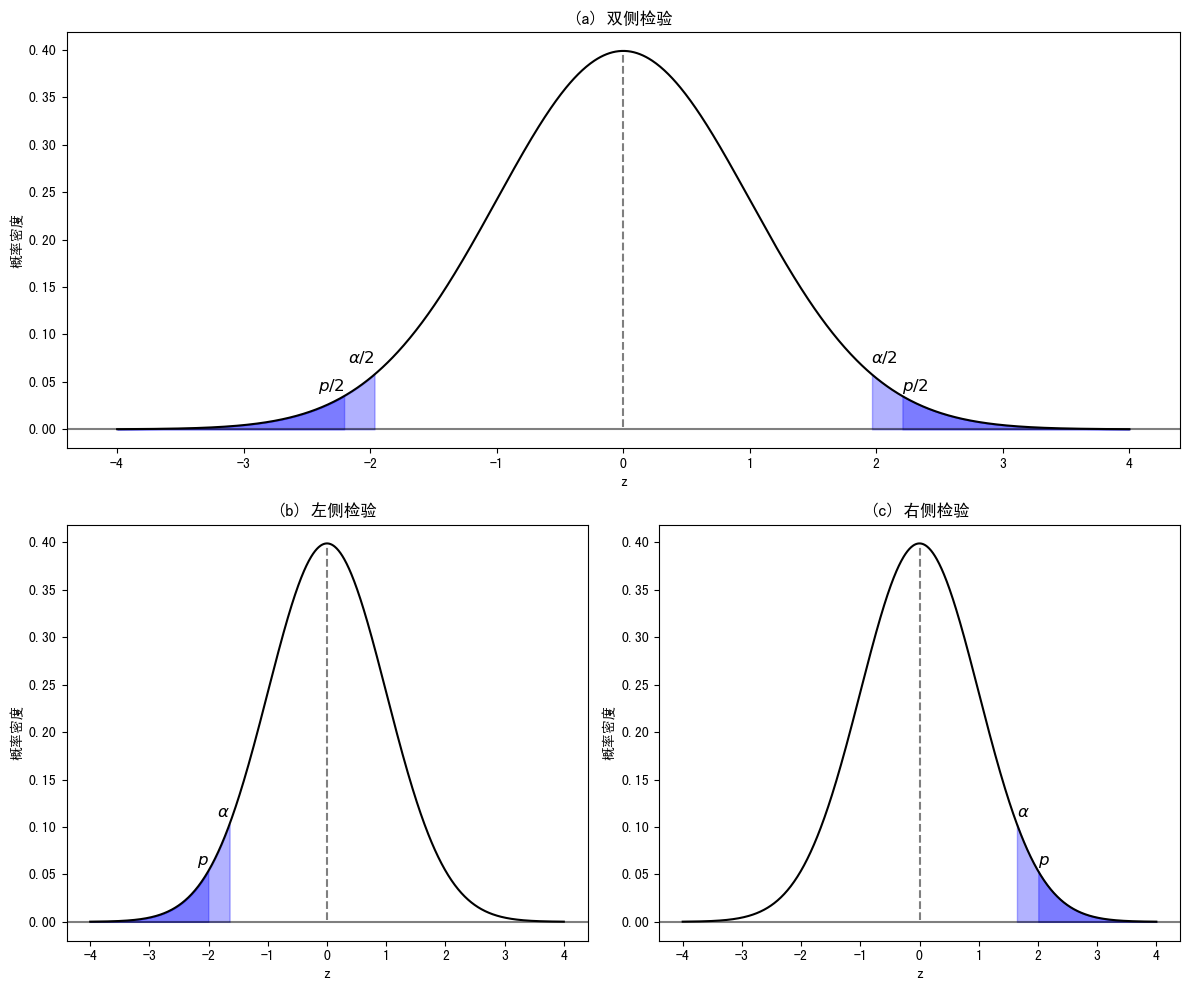

In [5]:
# P值与设定显著性水平的比较
plt.figure(figsize=(12, 10)) # 设置画布大小
x = np.linspace(-4, 4, 1000) # 生成-4到4之间的1000个点
y = norm.pdf(x, 0, 1) # 生成标准正态分布的概率密度函数
alpha = 0.05 # 设置显著性水平

plt.subplot(211) # 设置子图1
plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
z1 = norm.ppf(alpha/2, 0, 1) # 计算左侧临界值
z2 = norm.ppf(1-alpha/2, 0, 1) # 计算右侧临界值
plt.fill_between(x, y, 0, where=(x<=z1), color='b', alpha=0.3) # 绘制左侧拒绝域
plt.fill_between(x, y, 0, where=(x>=z2), color='b', alpha=0.3) # 绘制右侧拒绝域
plt.fill_between(x, y, 0, where=(x<=-2.2), color='b', alpha=0.3) # 绘制实际显著性水平左侧的面积
plt.fill_between(x, y, 0, where=(x>=2.2), color='b', alpha=0.3) # 绘制实际显著性水平右侧的面积
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(z1, 0.07, r'$\alpha/2$', fontsize=12, ha='right') # 显示左侧设定显著性水平
plt.text(-2.2, 0.04, r'$p/2$', fontsize=12, ha='right') # 显示左侧P值
plt.text(z2, 0.07, r'$\alpha/2$', fontsize=12, ha='left') # 显示右侧设定显著性水平
plt.text(2.2, 0.04, r'$p/2$', fontsize=12, ha='left') # 显示右侧P值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签
plt.title('(a) 双侧检验') # 设置标题

plt.subplot(223) # 设置子图2
plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
z = norm.ppf(alpha, 0, 1) # 计算临界值
plt.fill_between(x, y, 0, where=(x<=z), color='b', alpha=0.3) # 绘制拒绝域
plt.fill_between(x, y, 0, where=(x<=-2), color='b', alpha=0.3) # 绘制实际显著性水平左侧的面积
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(z, 0.11, r'$\alpha$', fontsize=12, ha='right') # 显示设定显著性水平
plt.text(-2, 0.06, r'$p$', fontsize=12, ha='right') # 显示P值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签
plt.title('(b) 左侧检验') # 设置标题

plt.subplot(224) # 设置子图3
plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
z = norm.ppf(1-alpha, 0, 1) # 计算临界值
plt.fill_between(x, y, 0, where=(x>=z), color='b', alpha=0.3) # 绘制拒绝域
plt.fill_between(x, y, 0, where=(x>=2), color='b', alpha=0.3) # 绘制实际显著性水平右侧的面积
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(z, 0.11, r'$\alpha$', fontsize=12, ha='left') # 显示设定显著性水平
plt.text(2, 0.06, r'$p$', fontsize=12, ha='left') # 显示P值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签
plt.title('(c) 右侧检验') # 设置标题

plt.tight_layout() # 设置子图的间距
plt.show() # 显示图像

利用P值做检验时的决策准则：
- 如果$P < \alpha$， 拒绝原假设。
- 如果$P > \alpha$， 不拒绝原假设。
- 双侧检验将两侧面积总和定义为P值。

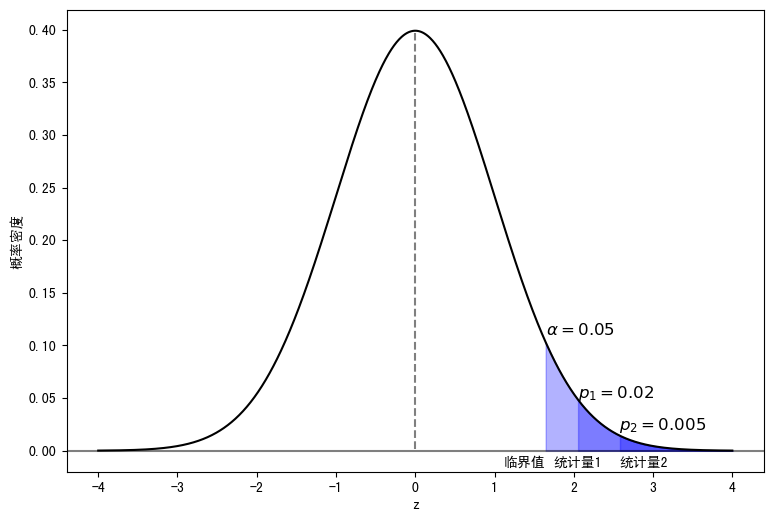

In [35]:
# 拒绝原假设的两个统计量的不同显著
plt.figure(figsize=(9, 6)) # 设置画布
x = np.linspace(-4, 4, 1000) # 生成x轴数据
y = norm.pdf(x, 0, 1) # 计算标准正态分布的概率密度函数
alpha = 0.05 # 设定显著性水平
z_alpha = norm.ppf(1-alpha, 0, 1) # 计算临界值
p1 = 0.02 # 设定P值
z_p1 = norm.ppf(1-p1, 0, 1) # 计算临界值
p2 = 0.005 # 设定P值
z_p2 = norm.ppf(1-p2, 0, 1) # 计算临界值

plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
plt.fill_between(x, y, 0, where=(x>=z_alpha), color='b', alpha=0.3) # 绘制拒绝域
plt.fill_between(x, y, 0, where=(x>=z_p1), color='b', alpha=0.3) # 绘制P值=0.02的面积
plt.fill_between(x, y, 0, where=(x>=z_p2), color='b', alpha=0.3) # 绘制P值=0.01的面积
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(z_alpha, 0.11, r'$\alpha={}$'.format(alpha), fontsize=12, ha='left') # 显示设定显著性水平
plt.text(z_alpha, -0.015, r'临界值', fontsize=10, ha='right') # 显示临界值
plt.text(z_p1, 0.05, r'$p_1={}$'.format(round(p1, 4)), fontsize=12, ha='left') # 显示P值
plt.text(z_p1, -0.015, r'统计量1', fontsize=10, ha='center') # 显示临界值
plt.text(z_p2, 0.02, r'$p_2={}$'.format(round(p2, 4)), fontsize=12, ha='left') # 显示P值
plt.text(z_p2, -0.015, r'统计量2', fontsize=10, ha='left') # 显示临界值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签

plt.show() # 显示图像

利用P值决策提供了更多的信息，因此更加常用，P值更小说明实际显著性差异更大。

### 6.1.3 表述结果

### 6.1.4 效应量分析

## 6.2 总体均值的检验

### 6.2.1 一个总体均值的检验

In [7]:
# 大样本
example6_3 = pd.read_csv('./pydata/chap06/example6_3.csv', encoding='gbk') # 读取数据
example6_3.head() # 显示前5行数据

,PM2.5值
0,82.6
1,68.5
2,85.1
3,97.6
4,93.5


$H_0: \mu \ge 81; H_1: \mu < 81$

In [8]:
z, p_value = ztest(x1=example6_3['PM2.5值'], value=81, alternative='smaller') # 计算z值和p值
pd.DataFrame({
    '样本均值': [example6_3['PM2.5值'].mean()],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本均值,z统计量,p值
0,79.55,-1.185558,0.117899


由于P>0.05，所以不能拒绝原假设。

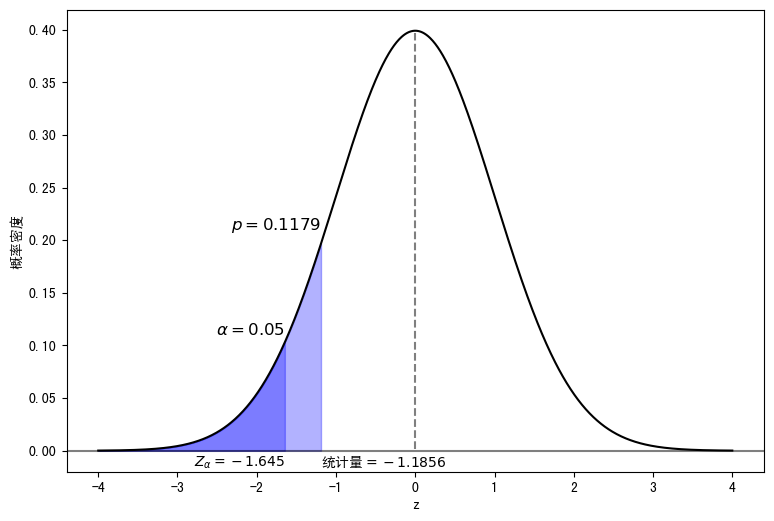

In [29]:
# 例子6-3的拒绝域和P值
plt.figure(figsize=(9, 6)) # 设置画布
x = np.linspace(-4, 4, 1000) # 生成x轴数据
y = norm.pdf(x, 0, 1) # 计算标准正态分布的概率密度函数
alpha = 0.05 # 设定显著性水平
z_alpha = norm.ppf(alpha, 0, 1) # 计算临界值

plt.plot(x, y, color='black') # 绘制标准正态分布的概率密度函数
plt.fill_between(x, y, 0, where=(x<=z_alpha), color='b', alpha=0.3) # 绘制拒绝域
plt.fill_between(x, y, 0, where=(x<=z), color='b', alpha=0.3) # 绘制实际显著性水平左侧的面积
plt.axvline(x=0, ymin=0.05, ymax=0.95, c='black', linestyle='--', alpha=0.5) # 绘制均值线
plt.axhline(y=0, c='black', linestyle='-', alpha=0.5) # 绘制底部基线
plt.text(z_alpha, 0.11, r'$\alpha={}$'.format(alpha), fontsize=12, ha='right') # 显示设定显著性水平
plt.text(z_alpha, -0.015, r'$Z_\alpha={}$'.format(round(z_alpha, 3)), fontsize=10, ha='right') # 显示临界值
plt.text(z, 0.21, r'$p={}$'.format(round(p_value, 4)), fontsize=12, ha='right') # 显示P值
plt.text(z, -0.015, r'统计量$={}$'.format(round(z, 4)), fontsize=10, ha='left') # 显示z值
plt.xlabel('z') # 设置x轴标签
plt.ylabel('概率密度') # 设置y轴标签

plt.show() # 显示图像


In [24]:
# 小样本
example6_4 = pd.read_csv('./pydata/chap06/example6_4.csv', encoding='gbk') # 读取数据
example6_4.head() # 显示前5行数据

,厚度
0,4.7
1,4.9
2,4.9
3,4.8
4,4.7


$H_0: \mu = 5; H_1: \mu \ne 5$

In [19]:
t, p_value = ttest_1samp(a=example6_4['厚度'], popmean=5) # 计算t值和p值
pd.DataFrame({
    '样本均值': [example6_4['厚度'].mean()],
    't统计量': [t],
    'p值': [p_value]
}) # 显示计算结果

,样本均值,t统计量,p值
0,4.8,-5.627314,0.00002


由于P<0.05，所以拒绝原假设。

In [21]:
# 单样本t检验的效应量
# Cohen的d统计量
mu = 5
xbar = example6_4['厚度'].mean()
sd = example6_4['厚度'].std()
d = abs(xbar - mu) / sd
print(f'效应量 d = {d:.4f}')

效应量 d = 1.2583


### 6.2.2 两个总体均值差的检验

In [22]:
# 独立大样本
example6_5 = pd.read_csv('./pydata/chap06/example6_5.csv', encoding='gbk') # 读取数据
example6_5.head() # 显示前5行数据

,男生上网时间,女生上网时间
0,4.1,2.8
1,3.0,2.6
2,3.5,3.6
3,2.4,0.9
4,3.8,2.3


$H_0: \mu_1 - \mu_2 = 0; H_1: \mu_1 - \mu_2 \ne 0$

In [26]:
z, p_value = ztest(
    x1=example6_5['男生上网时间'], x2=example6_5['女生上网时间'], 
    alternative='two-sided'
) # 计算z值和p值
pd.DataFrame({
    '男生样本均值': [example6_5['男生上网时间'].mean()],
    '女生样本均值': [example6_5['女生上网时间'].mean()],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,男生样本均值,女生样本均值,z统计量,p值
0,3.058333,2.830556,1.118825,0.263215


由于P>0.05，所以不能拒绝原假设。

In [24]:
# 独立小样本
example6_6 = pd.read_csv('./pydata/chap06/example6_6.csv', encoding='gbk') # 读取数据
example6_6.head() # 显示前5行数据

,甲企业,乙企业
0,8522,8428
1,9071,8298
2,8257,8317
3,8458,8761
4,8700,8058


$H_0: \mu_1 - \mu_2 = 0; H_1: \mu_1 - \mu_2 \ne 0$

In [27]:
xbar1 = example6_6['甲企业'].mean()
xbar2 = example6_6['乙企业'].mean()
# 假设总体方差相等
t, p_value, df = ttest_ind(
    x1=example6_6['甲企业'], x2=example6_6['乙企业'],
    alternative='two-sided', usevar='pooled'
) # 计算t值和p值
pd.DataFrame({
    '甲企业样本均值': [xbar1],
    '乙企业样本均值': [xbar2],
    't统计量': [t],
    'p值': [p_value]
}) # 显示计算结果

,甲企业样本均值,乙企业样本均值,t统计量,p值
0,8487.5,8166.0,3.49427,0.001225


In [28]:
# 假设总体方差不相等
t, p_value, df = ttest_ind(
    x1=example6_6['甲企业'], x2=example6_6['乙企业'],
    alternative='two-sided', usevar='unequal'
) # 计算t值和p值
pd.DataFrame({
    '甲企业样本均值': [xbar1],
    '乙企业样本均值': [xbar2],
    't统计量': [t],
    'p值': [p_value]
}) # 显示计算结果

,甲企业样本均值,乙企业样本均值,t统计量,p值
0,8487.5,8166.0,3.49427,0.001353


由于P<0.05，所以拒绝原假设。

In [30]:
# 单样本t检验的效应量
t = 3.49427
n1 = len(example6_6['甲企业'])
n2 = len(example6_6['乙企业'])
d = abs(t) * np.sqrt((n1 + n2) / (n1 * n2))
print(f'效应量 d = {d:.6f}')

效应量 d = 1.104985


效应量 d = 1.104985 表示两个总体均值差1.104985个标准差，属于大的效应量。

In [31]:
# 配对样本
example6_7 = pd.read_csv('./pydata/chap06/example6_7.csv', encoding='gbk') # 读取数据
example6_7.head() # 显示前5行数据

,旧款饮料,新款饮料
0,7,8
1,8,10
2,6,9
3,7,9
4,8,9


$H_0: \mu_1 - \mu_2 = 0; H_1: \mu_1 - \mu_2 \ne 0$

In [33]:
dbar = (example6_7['旧款饮料'] - example6_7['新款饮料']).mean()
t, p_value = ttest_rel(a=example6_7['旧款饮料'], b=example6_7['新款饮料'])
pd.DataFrame({
    '旧款饮料样本均值': [example6_7['旧款饮料'].mean()],
    '新款饮料样本均值': [example6_7['新款饮料'].mean()],
    '配对样本差值的均值': [dbar],
    't统计量': [t],
    'p值': [p_value]
}) # 显示计算结果

,旧款饮料样本均值,新款饮料样本均值,配对样本差值的均值,t统计量,p值
0,7.5,8.8,-1.3,-2.750848,0.022446


由于P<0.05，所以拒绝原假设。

In [34]:
# 配对样本的效应量
t = -2.750848
n = example6_7.shape[0]
d = abs(t) / np.sqrt(n)
print(f'效应量 d = {d:.6f}')

效应量 d = 0.869895


效应量 d = 0.869895 表示两个总体均值差0.869895个标准差，属于大的效应量。

## 6.3 总体比例的检验

### 6.3.1 一个总体比例的检验

$H_0: \pi \le 25\%; H_1: \pi > 25\%$

In [36]:
n = 2000
p = 450 / n
pi0 = 0.25
z = (p - pi0) / np.sqrt(pi0 * (1 - pi0) / n)
p_value = 1 - norm.cdf(z)
pd.DataFrame({
    '样本比例': [p],
    '原假设比例': [pi0],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本比例,原假设比例,z统计量,p值
0,0.225,0.25,-2.581989,0.995088


由于P>0.05，所以不能拒绝原假设。

### 6.3.2 两个总体比例差的检验

$H_0: \pi_1 - \pi_2 = 0; H_1: \pi_1 - \pi_2 \ne 0$

In [38]:
n1 = 200
n2 = 200
p1 = 0.27
p2 = 0.35
p = (p1 * n1 + p2 * n2) / (n1 + n2)
z = (p1 - p2) / np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
p_value = norm.cdf(z)
pd.DataFrame({
    '样本比例1': [p1],
    '样本比例2': [p2],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本比例1,样本比例2,z统计量,p值
0,0.27,0.35,-1.729755,0.041837


由于P<0.05，所以拒绝原假设。

$H_0: \pi_1 - \pi_2 \ge 8\%; H_1: \pi_1 - \pi_2 < 8\%$

In [39]:
n1 = 300
n2 = 300
p1 = 33/300
p2 = 84/300
d0 = 0.08
z = (p1 - p2 - d0) / np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
p_value = norm.cdf(z)
pd.DataFrame({
    '样本比例1': [p1],
    '样本比例2': [p2],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本比例1,样本比例2,z统计量,p值
0,0.11,0.28,-7.91229,1.263480e-15


由于P<0.01，所以拒绝原假设。

## 6.4 总体方差的检验

### 6.4.1 一个总体方差的检验

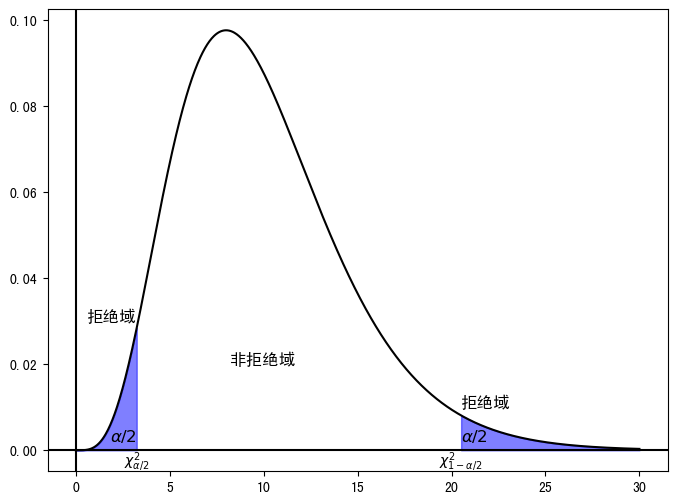

In [53]:
plt.figure(figsize=(8, 6))
x = np.linspace(0, 30, 1000) # 生成0到30的1000个等差数列
y = chi2.pdf(x, df=10) # 生成自由度为4的卡方分布概率密度函数
alpha = 0.05
x1 = chi2.ppf(alpha / 2, df=10) # 计算左侧临界值
x2 = chi2.ppf(1 - alpha / 2, df=10) # 计算右侧临界值
plt.plot(x, y, color='black') # 绘制卡方分布概率密度函数
plt.fill_between(x, y, where=(x < x1), color='b', alpha=0.5) # 绘制左侧拒绝域
plt.fill_between(x, y, where=(x > x2), color='b', alpha=0.5) # 绘制右侧拒绝域
plt.axvline(x=0, ls='-', color='black') # 绘制左侧竖直直线
plt.axhline(y=0, ls='-', color='black') # 绘制底部水平直线
plt.text(x1, 0.03, '拒绝域', fontsize=12, ha='right') # 绘制拒绝域标签
plt.text(x2, 0.01, '拒绝域', fontsize=12, ha='left') # 绘制拒绝域标签
plt.text(10, 0.02, '非拒绝域', fontsize=12, ha='center') # 绘制非拒绝域标签
plt.text(x1, 0.002, r'$\alpha/2$', fontsize=12, ha='right') # 绘制左侧临界值标签
plt.text(x2, 0.002, r'$\alpha/2$', fontsize=12, ha='left') # 绘制右侧临界值标签
plt.text(x1, 0, r'$\chi^2_{\alpha/2}$', fontsize=10, ha='center', va='top') # 绘制左侧临界值
plt.text(x2, 0, r'$\chi^2_{1-\alpha/2}$', fontsize=10, ha='center', va='top') # 绘制右侧临界值
plt.show() # 显示图形

In [2]:
example6_11 = pd.read_csv('./pydata/chap06/example6_11.csv', encoding='gbk') # 读取数据
example6_11.head() # 显示前5行数据

,填装量
0,638.3
1,642.0
2,640.4
3,641.1
4,637.2


$H_0: \sigma^2 \le 16; H_1: \sigma^2 > 16$

In [4]:
x = example6_11['填装量'] # 提取填装量数据
sigma0_2 = 16 # 原假设方差
s2 = x.var() # 计算样本方差
n = len(x) # 样本容量
df = n - 1 # 自由度
chi2_value = (n - 1) * s2 / sigma0_2 # 计算卡方统计量
p_value = 1 - chi2.cdf(chi2_value, df) # 计算p值
pd.DataFrame({
    '样本方差': [s2],
    '原假设方差': [sigma0_2],
    '卡方统计量': [chi2_value],
    'p值': [p_value]
}) # 显示计算结果

,样本方差,原假设方差,卡方统计量,p值
0,5.287222,16,2.974063,0.965314


由于P>0.05，所以不能拒绝原假设。

### 6.4.2 两个总体方差比的检验

In [5]:
example6_6 = pd.read_csv('./pydata/chap06/example6_6.csv', encoding='gbk') # 读取数据
example6_6.head() # 显示前5行数据

,甲企业,乙企业
0,8522,8428
1,9071,8298
2,8257,8317
3,8458,8761
4,8700,8058


$H_0: \frac{\sigma_1^2}{\sigma_2^2} = 1; H_1: \frac{\sigma_1^2}{\sigma_2^2} \ne 1$

In [9]:
x1 = example6_6['甲企业'] # 提取甲企业数据
x2 = example6_6['乙企业'] # 提取乙企业数据
s1_square = x1.var() # 计算甲企业样本方差
s2_square = x2.var() # 计算乙企业样本方差
dfn = len(x1) - 1 # 甲企业样本自由度
dfd = len(x2) - 1 # 乙企业样本自由度
f_value = s1_square / s2_square # 计算F统计量
p_value = f.cdf(f_value, dfn, dfd) * 2 # 计算p值 双侧检验所以乘以2
pd.DataFrame({
    '甲企业样本方差': [s1_square],
    '乙企业样本方差': [s2_square],
    '甲企业样本自由度': [dfn],
    '乙企业样本自由度': [dfd],
    'F统计量': [f_value],
    'p值': [p_value]
}) # 显示计算结果

,甲企业样本方差,乙企业样本方差,甲企业样本自由度,乙企业样本自由度,F统计量,p值
0,54346.263158,114962.315789,19,19,0.472731,0.111039


由于P>0.05，所以不能拒绝原假设。

## 6.5 正态性检验

### 6.5.1 正态概率图

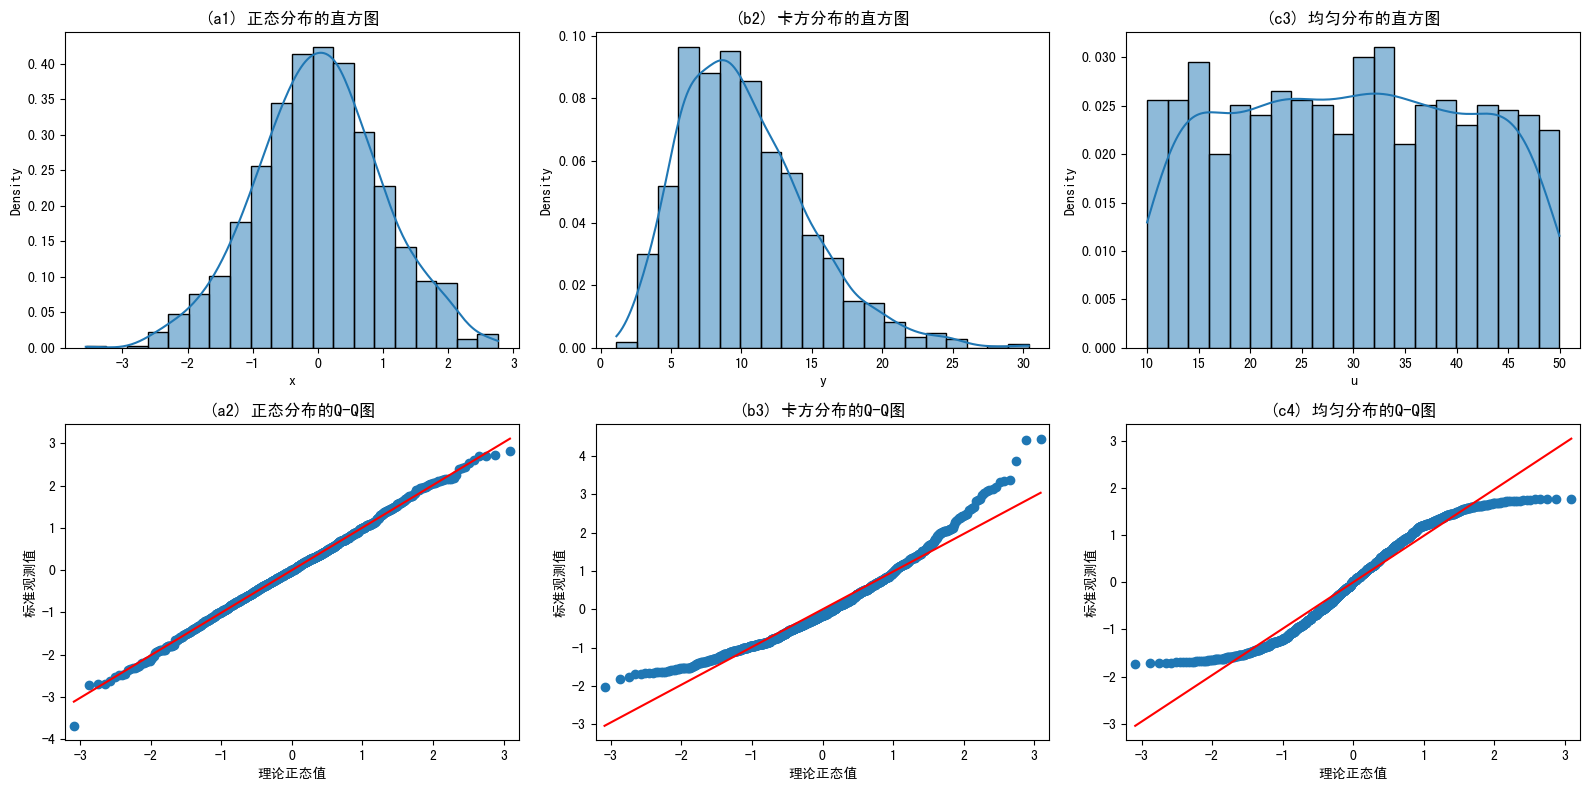

In [61]:
# 不同分布的直方图与正态Q-Q图的比较
np.random.seed(1234) # 设置随机种子
x = np.random.normal(0, 1, 1000) # 生成标准正态分布随机数
y = np.random.chisquare(10, 1000) # 生成自由度为10的卡方分布随机数
u = np.random.uniform(10, 50, 1000) # 生成10到50之间均匀分布随机数
ls = ['x', 'y', 'u']
titles = {
    'x': ['a', '正态分布'],
    'y': ['b', '卡方分布'],
    'u': ['c', '均匀分布']
}

def plot_dist(x, ax_hist, ax_qq):
    pplot = sm.ProbPlot(x, fit=True) # 生成概率图对象
    sns.histplot(x, bins=20, ax=ax_hist, stat='density', kde=True) # 绘制直方图
    pplot.qqplot(line='r', ax=ax_qq, xlabel='理论正态值', ylabel='标准观测值') # 绘制QQ图

plt.subplots(2, 3, figsize=(16, 8)) # 设置图形尺寸
for i in range(3):
    ax_hist = plt.subplot(2, 3, i+1)
    ax_qq = plt.subplot(2, 3, i+4)
    plot_dist(eval(ls[i]), ax_hist, ax_qq) # 绘制概率图
    ax_hist.set_xlabel(ls[i]) # 设置x轴标签
    ax_hist.set_title(f'({titles[ls[i]][0]}{i+1}) {titles[ls[i]][1]}的直方图') # 设置子图标题
    ax_qq.set_title(f'({titles[ls[i]][0]}{i+2}) {titles[ls[i]][1]}的Q-Q图') # 设置子图标题
plt.tight_layout() # 设置子图间距
plt.show() # 显示图形


In [54]:
example6_3 = pd.read_csv('./pydata/chap06/example6_3.csv', encoding='gbk') # 读取数据
example6_3.head() # 显示前5行数据

,PM2.5值
0,82.6
1,68.5
2,85.1
3,97.6
4,93.5


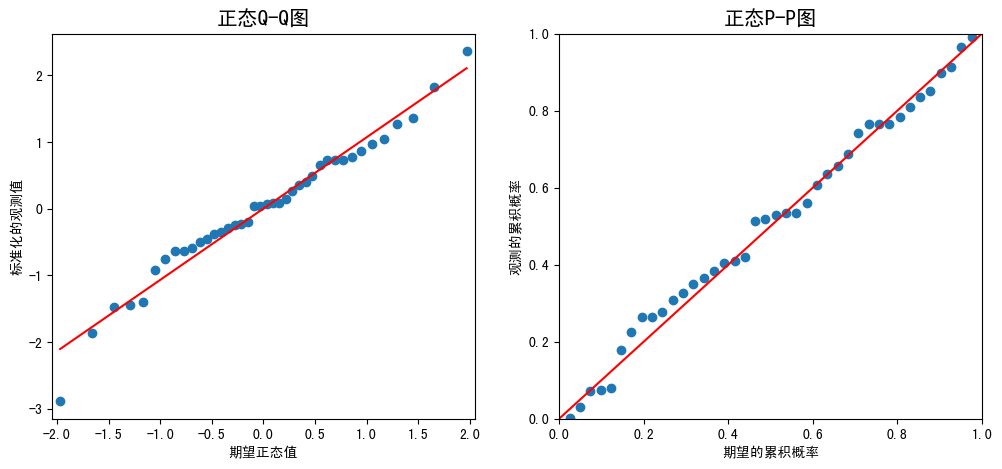

In [58]:
pplot = sm.ProbPlot(example6_3['PM2.5值'], fit=True) # 绘制概率图
plt.subplots(1, 2, figsize=(12, 5)) # 设置图形大小

# 绘制Q-Q图
ax1 = plt.subplot(121) # 绘制第一个子图
pplot.qqplot(line='r', ax=ax1, xlabel='期望正态值', ylabel='标准化的观测值') # 绘制Q-Q图
ax1.set_title('正态Q-Q图', fontsize=15) # 设置子图标题

# 绘制P-P图
ax2 = plt.subplot(122) # 绘制第二个子图
pplot.ppplot(line='45', ax=ax2, xlabel='期望的累积概率', ylabel='观测的累积概率') # 绘制P-P图
ax2.set_title('正态P-P图', fontsize=15) # 设置子图标题

plt.show() # 显示图形

### 6.5.2 S-W检验和K-S检验

In [63]:
example6_4 = pd.read_csv('./pydata/chap06/example6_4.csv', encoding='gbk') # 读取数据
example6_4.head() # 显示前5行数据

,厚度
0,4.7
1,4.9
2,4.9
3,4.8
4,4.7


$H_0: X \sim N(\mu, \sigma^2); H_1: X \nsim N(\mu, \sigma^2)$

In [64]:
# S-W正态性检验
W, p_value = shapiro(example6_4['厚度']) # 计算S-W统计量和p值
pd.DataFrame({
    'S-W统计量': [W],
    'p值': [p_value]
}) # 显示计算结果

,S-W统计量,p值
0,0.913768,0.075222


由于P>0.05，所以不能拒绝原假设。

In [65]:
# K-S正态性检验
D, p_value = kstest(
    example6_4['厚度'], 'norm', alternative='two-sided', 
    mode='asymp', args=(example6_4['厚度'].mean(), example6_4['厚度'].std())
) # 计算K-S统计量和p值
pd.DataFrame({
    'K-S统计量': [D],
    'p值': [p_value]
}) # 显示计算结果

,K-S统计量,p值
0,0.235376,0.217792


由于P>0.05，所以不能拒绝原假设。

## 习题

### 6.1

In [81]:
df = pd.read_csv('./exercise/chap06/exercise6_1.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,零件误差
0,1.26
1,1.13
2,0.98
3,1.12
4,1.23


<Figure size 800x500 with 0 Axes>

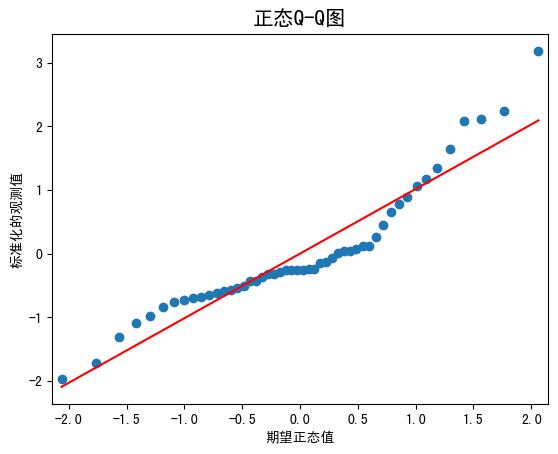

In [82]:
# (1) 绘制Q-Q图，检验零件尺寸的绝对误差是否服从正态分布。
pplot = sm.ProbPlot(df['零件误差'], fit=True) # 绘制概率图
plt.figure(figsize=(8, 5)) # 设置图形大小
pplot.qqplot(line='r', xlabel='期望正态值', ylabel='标准化的观测值') # 绘制Q-Q图
plt.title('正态Q-Q图', fontsize=15) # 设置子图标题
plt.show() # 显示图形

$H_0: \mu \ge 1.35; H_1: \mu < 1.35$

In [83]:
# (2) 检验新机床加工的零件尺寸的平均误差与旧机床相比是否有显著降低（α=0.01）。
z, p_value = ztest(x1=df['零件误差'], value=1.35, alternative='smaller') # 计算z统计量和p值
pd.DataFrame({
    '样本均值': [df['零件误差'].mean()],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本均值,z统计量,p值
0,1.2152,-2.606103,0.004579


由于P<0.01，所以拒绝原假设。

### 6.2

In [84]:
df = pd.read_csv('./exercise/chap06/exercise6_2.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,重量
0,22.6
1,27.0
2,26.2
3,25.8
4,22.2


$H_0: X \sim N(\mu, \sigma^2); H_1: X \nsim N(\mu, \sigma^2)$

In [85]:
# (1) 采用S-W检验和K-S检验两种方法，检验该企业生产的金属板重量是否服从正态分布（α=0.05）。
W, p_value1 = shapiro(df['重量']) # 计算S-W统计量和p值
D, p_value2 = kstest(
    df['重量'], 'norm', alternative='two-sided',
    mode='asymp', args=(df['重量'].mean(), df['重量'].std())
) # 计算K-S统计量和p值
pd.DataFrame({
    '方法': ['S-W检验', 'K-S检验'],
    '统计量': [W, D],
    'p值': [p_value1, p_value2]
}) # 显示计算结果

,方法,统计量,p值
0,S-W检验,0.970642,0.768383
1,K-S检验,0.108081,0.973606


由于P>0.05，所以不能拒绝原假设。

$H_0: X = 25; H_1: X \ne 25$

In [86]:
# (2) 假定金属板的重量服从正态分布，检验该企业生产的金属板是否符合要求（α=0.05）。
z, p_value = ztest(x1=df['重量'], value=25, alternative='two-sided') # 计算z统计量和p值
pd.DataFrame({
    '样本均值': [df['重量'].mean()],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本均值,z统计量,p值
0,25.51,1.039905,0.298384


由于P>0.05，所以不能拒绝原假设。

In [87]:
# (3) 计算效应量分析差异程度。
d = (df['重量'].mean() - 25) / df['重量'].std() # 计算效应量
pd.DataFrame({
    '样本均值': [df['重量'].mean()],
    '样本标准差': [df['重量'].std()],
    '效应量': [d]
}) # 显示计算结果

,样本均值,样本标准差,效应量
0,25.51,2.193267,0.23253


d = 0.23253 表示总体均值与25的差0.23253个标准差，属于小的效应量。

### 6.3

In [88]:
df = pd.read_csv('./exercise/chap06/exercise6_3.csv', encoding='gbk') # 读取数据
df # 显示数据

,看后,看前
0,6,5
1,6,4
2,7,7
3,4,3
4,3,5
5,9,8
6,7,5
7,6,6


$H_0: \mu_1 \ge \mu_2; H_1: \mu_1 < \mu_2$

In [90]:
dbar = (df['看前'] - df['看后']).mean() # 计算差值的均值
t, p_value = ttest_rel(df['看前'], df['看后'], alternative='less') # 计算t统计量和p值
pd.DataFrame({
    '看前样本均值': [df['看前'].mean()],
    '看后样本均值': [df['看后'].mean()],
    '配对样本均值差': [dbar],
    't统计量': [t],
    'p值': [p_value]
}) # 显示计算结果

,看前样本均值,看后样本均值,配对样本均值差,t统计量,p值
0,5.375,6.0,-0.625,-1.357242,0.108419


由于P>0.05，所以不能拒绝原假设。

In [91]:
d = abs(t) / np.sqrt(len(df)) # 计算效应量
print('效应量：', d) # 显示效应量

效应量： 0.47985743496869654


d = 0.47986 表示两个总体均值差0.47986个标准差，属于小的效应量。

### 6.4

In [92]:
df = pd.read_csv('./exercise/chap06/exercise6_4.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,方法1,方法2
0,56,59
1,47,52
2,42,53
3,50,54
4,47,58


$H_0: \mu_1 - \mu_2 = 0; H_1: \mu_1 - \mu_2 \ne 0$

In [94]:
# (1) 假定方差相等
t, p_value, dof = ttest_ind(df['方法1'], df['方法2'], alternative='two-sided', usevar='pooled') # 计算t统计量和p值
pd.DataFrame({
    '方法1样本均值': [df['方法1'].mean()],
    '方法2样本均值': [df['方法2'].mean()],
    't统计量': [t],
    'p值': [p_value],
    '自由度': [dof]
}) # 显示计算结果

,方法1样本均值,方法2样本均值,t统计量,p值,自由度
0,47.733333,56.733333,-5.892685,0.000002,28.0


由于P<0.05，所以拒绝原假设。

In [95]:
# (2) 假定方差不相等
t, p_value, dof = ttest_ind(df['方法1'], df['方法2'], alternative='two-sided', usevar='unequal') # 计算t统计量和p值
pd.DataFrame({
    '方法1样本均值': [df['方法1'].mean()],
    '方法2样本均值': [df['方法2'].mean()],
    't统计量': [t],
    'p值': [p_value],
    '自由度': [dof]
}) # 显示计算结果

,方法1样本均值,方法2样本均值,t统计量,p值,自由度
0,47.733333,56.733333,-5.892685,0.000003,27.638807


由于P<0.05，所以拒绝原假设。

In [96]:
# (3) 计算效应量, 分析差异程度
n1 = len(df['方法1']) # 计算样本1的样本量
n2 = len(df['方法2']) # 计算样本2的样本量
d = abs(t) * np.sqrt((n1 + n2) / (n1 * n2)) # 计算效应量
print('效应量：', d) # 显示效应量

效应量： 2.151704265599182


d = 2.1517 表示两个总体均值差2.1517个标准差，属于大的效应量。

### 6.5

$H_0: \pi \le 0.17; H_1: \pi > 0.17$

In [100]:
n = 550
x = 115
p = x / n
pi0 = 0.17
alpha = 0.05
z = (p - pi0) / np.sqrt(pi0 * (1 - pi0) / n)
p_value = 1 - norm.cdf(z)
pd.DataFrame({
    '样本比例': [p],
    '原假设比例': [pi0],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本比例,原假设比例,z统计量,p值
0,0.209091,0.17,2.440583,0.007332


由于P<0.05，所以拒绝原假设。

### 6.6

$H_0: \pi_1 - \pi_2 = 0; H_1: \pi_1 - \pi_2 \ne 0$

In [2]:
n1 = 100
n2 = 95
x1 = 24
x2 = 39
p1 = x1 / n1
p2 = x2 / n2
p = (p1 * n1 + p2 * n2) / (n1 + n2)
z = (p1 - p2) / np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
p_value = norm.cdf(z)
pd.DataFrame({
    '样本比例1': [p1],
    '样本比例2': [p2],
    'z统计量': [z],
    'p值': [p_value]
}) # 显示计算结果

,样本比例1,样本比例2,z统计量,p值
0,0.24,0.410526,-2.545149,0.005462


由于P<0.05，所以拒绝原假设。

### 6.7

In [2]:
df = pd.read_csv('./exercise/chap06/exercise6_7.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,旧肥料,新肥料
0,109,105
1,98,113
2,103,106
3,97,110
4,101,109


$H_0: \mu_1 - \mu_2 \ge 0; H_1: \mu_1 - \mu_2 < 0$

In [3]:
# (1) 检验新肥料获得地平均产量是否显著地高于旧肥料，假定方差相等。
x1 = df['旧肥料'] # 提取旧肥料数据
x2 = df['新肥料'] # 提取新肥料数据
t, p_value, dof = ttest_ind(x1, x2, alternative='smaller', usevar='pooled') # 计算t统计量和p值
pd.DataFrame({
    '旧肥料样本均值': [x1.mean()],
    '新肥料样本均值': [x2.mean()],
    't统计量': [t],
    'p值': [p_value],
    '自由度': [dof]
}) # 显示计算结果

,旧肥料样本均值,新肥料样本均值,t统计量,p值,自由度
0,100.7,109.9,-5.427106,0.000002,38.0


由于P<0.05，所以拒绝原假设。

$H_0: \frac{\sigma_1^2}{\sigma_2^2} = 1; H_1: \frac{\sigma_1^2}{\sigma_2^2} \ne 1$

In [5]:
# (2) 检验两种肥料产量的方差是否有显著差异。
s1_square = x1.var() # 计算旧肥料样本方差
s2_square = x2.var() # 计算新肥料样本方差
F = s1_square / s2_square # 计算F统计量
dfn = len(x1) - 1 # 计算旧肥料样本自由度
dfd = len(x2) - 1 # 计算新肥料样本自由度
p_value = f.cdf(F, dfn, dfd) * 2 # 计算p值
pd.DataFrame({
    '旧肥料样本方差': [s1_square],
    '新肥料样本方差': [s2_square],
    'F统计量': [F],
    'p值': [p_value]
}) # 显示计算结果

,旧肥料样本方差,新肥料样本方差,F统计量,p值
0,24.115789,33.357895,0.722941,0.486219


由于P>0.05，所以不能拒绝原假设。

In [10]:
# (3) 计算效应量，分析差异程度。
n1 = len(x1) # 计算旧肥料样本量
n2 = len(x2) # 计算新肥料样本量
d = abs(t) * np.sqrt((n1 + n2) / (n1 * n2))
print(f'效应量 d = {d:.6f}')

效应量 d = 1.716202


d = 1.716202 表示两个总体均值差1.716202个标准差，属于大的效应量。

### 6.8

In [11]:
df = pd.read_csv('./exercise/chap06/exercise6_8.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,机器1,机器2
0,2.95,3.22
1,3.16,3.38
2,3.20,3.30
3,3.45,3.30
4,3.20,3.34


$H_0: \frac{\sigma_1^2}{\sigma_2^2} = 1; H_1: \frac{\sigma_1^2}{\sigma_2^2} \ne 1$

In [20]:
x1 = df['机器1']
x2 = df['机器2']
s1_square = x1.var()
s2_square = x2.var()
F = s1_square / s2_square
dfn = len(x1) - 1
dfd = len(x2) - 1
# 由于这里F统计量大于1，所以p值等于右侧的面积*2
p_value = (1 - f.cdf(F, dfn, dfd)) * 2
pd.DataFrame({
    '机器1样本方差': [s1_square],
    '机器2样本方差': [s2_square],
    'F统计量': [F],
    'p值': [p_value]
}) # 显示计算结果

,机器1样本方差,机器2样本方差,F统计量,p值
0,0.050993,0.005622,9.071058,0.000001


由于P<0.05，所以拒绝原假设。